# Pocket Algorithm

In [2]:
using Plots
using MLDatasets
using Images
using TestImages
using CSV

┌ Info: Recompiling stale cache file C:\Users\chadw\.julia\compiled\v1.0\CSV\HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1184


In [12]:
train_x, train_y = MNIST.traindata()
test_x, test_y = MNIST.testdata()

(Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [13]:
# train_x is a tensor, which is a multidimensional martix
train_x[:,:,1]

28×28 Array{N0f8,2} with eltype Normed{UInt8,8}:
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.216  0.533  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.675  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.071  0.886  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.671  0.992  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.118     0.859  0.992  0.831  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.141     0.992  0.992  0.529  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.369  …  0.992  0.992  0.518  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.604     0.992  0.957  0.063  0.0  0.0  0.0
 0.0  0.0  0.0 

In [15]:
train_y[1]

5

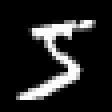

In [32]:
using ImageMagick
colorview(Gray, train_x[:,:,1]')

Use the pocket algorithm to classify images of numbers in the set {1, 5}. This is a binary classification problem,
even though the input vectors have dimensions we have not seen before. 

Steps:

1) Collect all images that are 5 or 1

2) Turn each of the matrices into a (28 x 28 = 784) x 1 Array

3) Use that array as an input and use the pocket algorithm

In [113]:
pocket_train_x = []
pocket_train_y = []
for i = 1:60000
    if train_y[i] == 1 || train_y[i] == 5
        push!(pocket_train_x, reshape(train_x[:,:,i], 784))
        push!(pocket_train_y, train_y[i] == 1 ? 1 : -1)
    end
end

function sign(w, x)
    if size(x)[1] == 784
        y = push!(copy(x), 1.0)
    end
    return (w'y)[1] > 0 ? 1 : -1
end

function errors(w)
     return sum([sign(w, pocket_train_x[i]) != pocket_train_y[i] ? 1 : 0 for i = 1:size(pocket_train_x)[1]]) / size(pocket_train_x)[1]
end

function PocketPerceptron(w0, num_iterations = 100)
    w_hat = w0
    n = size(pocket_train_x)[1]
    for _ = 1:num_iterations
        for i = 1:n
            x_i = push!(pocket_train_x[i], 1.0)
            h = sign(w_hat, x_i)
            if h != pocket_train_y[i]
                w_new = w_hat + pocket_train_y[i]*x_i
                if errors(w_new) < errors(w_hat)
                    w_hat = w_new
                end
            end
        end
    end
    return w_hat
end

PocketPerceptron (generic function with 3 methods)

In [115]:
w0 = rand(785, 1)
PocketPerceptron(w0, 50)

UndefVarError: UndefVarError: y not defined

In [66]:
pocket_train_x[1]

784-element Array{N0f8,1} with eltype Normed{UInt8,8}:
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 ⋮      
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8